In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Сгенерируем выборку $X_1, \dots, X_{100}$ из распределения $N(0, 1)$:

In [24]:
N = 100
x_dist = norm.rvs(loc=0, scale=1, size=N)

### Модель $N(\theta, 1)$

Выведем **оценку максимального правдоподобия**:

$$p_\theta (x) = \frac{1}{\sqrt{2\pi}} \exp \left(-\frac{(x - \theta)^2}{2} \right)$$

$$L(\theta ~|~ X) = \prod\limits_{i=1}^n \frac{1}{\sqrt{2\pi}} \exp \left(-\frac{(X_i - \theta)^2}{2} \right) 
= \frac{1}{(2\pi)^{n / 2}} \exp \left(-\frac{\sum\limits_{i=1}^n (X_i - \theta)^2}{2} \right)$$

$$\ln L(\theta ~|~ X) = -\ln (2\pi)^{n / 2} - \frac12 \sum\limits_{i=1}^n (X_i - \theta)^2$$

$$\frac{\partial}{\partial \theta} \ln L(\theta ~|~ X) = \sum\limits_{i=1}^n (X_i - \theta) = n\overline{X} - n\theta$$

$$n\overline{X} = n\theta \; \Rightarrow \; \widehat{\theta} = \overline{X}$$


Выведем **байесовские оценки**. Возьмем в качестве априорного распределения $Bin(p, 1)$. Сопряженное априорное
распределение — $N(a_0, \sigma_0^2)$. Полученная оценка:

$$\widehat{\theta} = \frac{\frac{a_0}{\sigma_0^2} + \sum{X_i}}{\frac{1}{\sigma_0^2} + n},$$

где $(a_0, \sigma_0^2) = (0, 1), \ (0, 100), \ (10, 1), \ (10, 100).$

Построим график модуля отклонения оценки от истинного значения параметра $\theta = 0$:

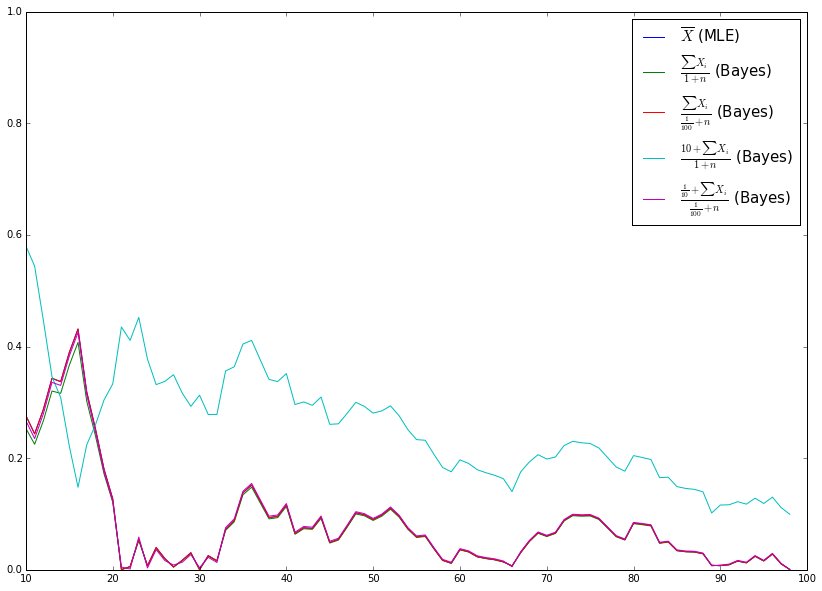

In [25]:
mle = [np.average(x_dist[:n]) for n in range (1, N)]
bayes1 = [np.sum(x_dist[:n]) / (1 + n) for n in range (1, N)]
bayes2 = [np.sum(x_dist[:n]) / (1 / 100 + n) for n in range (1, N)]
bayes3 = [(10 + np.sum(x_dist[:n])) / (1 + n) for n in range (1, N)]
bayes4 = [(1 / 10 + np.sum(x_dist[:n])) / (1 / 100 + n) for n in range (1, N)]

plt.figure(figsize=(14, 10))
plt.plot(abs(np.zeros(N - 1) - mle), label='$\\overline{X}$ (MLE)')
plt.plot(abs(np.zeros(N - 1) - bayes1), label='$\\frac{\\sum{X_i}}{1 + n}$ (Bayes)')
plt.plot(abs(np.zeros(N - 1) - bayes2), label='$\\frac{\\sum{X_i}}{\\frac{1}{100} + n}$ (Bayes)')
plt.plot(abs(np.zeros(N - 1) - bayes3), label='$\\frac{10 + \\sum{X_i}}{1 + n}$ (Bayes)')
plt.plot(abs(np.zeros(N - 1) - bayes4), label='$\\frac{\\frac{1}{10} + \\sum{X_i}}{\\frac{1}{100} + n}$ (Bayes)')
plt.xlim(xmin=10)
plt.ylim(ymax=1)
plt.legend(fontsize=15)
plt.show()

Из графиков видно, что лучшая оценка при параметрах априорного распределения $(0, 1)$.

### Модель $N(0, \theta)$

Выведем **оценку максимального правдоподобия**:

$$p_\theta (x) = \frac{1}{\sqrt{2\pi\theta^2}} \exp \left(-\frac{x^2}{2\theta^2} \right)$$

$$L(\theta ~|~ X) = \prod\limits_{i=1}^n \frac{1}{\sqrt{2\pi\theta^2}} \exp \left(-\frac{X_i^2}{2\theta^2} \right) 
= \frac{1}{(2\pi\theta^2)^{n / 2}} \exp \left(-\frac{\sum\limits_{i=1}^n X_i^2}{2\theta^2} \right)$$

$$\ln L(\theta ~|~ X) = -\ln (2\pi)^{n / 2} - \frac{n}{2} \ln \theta^2 - \frac{\sum\limits_{i=1}^n X_i^2}{2\theta^2}$$

$$\frac{\partial}{\partial \theta^2} \ln L(\theta ~|~ X) 
= -\frac{n}{2\theta^2} + \frac{\sum\limits_{i=1}^n X_i^2}{2\theta^4}$$

$$\frac{\sum\limits_{i=1}^n X_i^2}{2\theta^4} = \frac{n}{2\theta^2} \; \Rightarrow \; \widehat{\theta^2} 
= \frac{1}{n} \sum\limits_{i=1}^n X_i^2$$

Выведем **байесовские оценки**. Возьмем в качестве априорного распределения $Bin(p, 1)$. Сопряженное априорное
распределение — $Inverse-gamma(\alpha_0, \beta_0)$. Полученная оценка:

$$\widehat{\theta} = \frac{\beta_0 + \sum{X_i^2}}{\alpha_0 + \frac{n}{2} - 1},$$

где $(\alpha_0, \beta_0) = (1, 1), \ (1, 100), \ (10, 1), \ (10, 100).$

Построим график модуля отклонения оценки от истинного значения параметра $\theta = 1$:

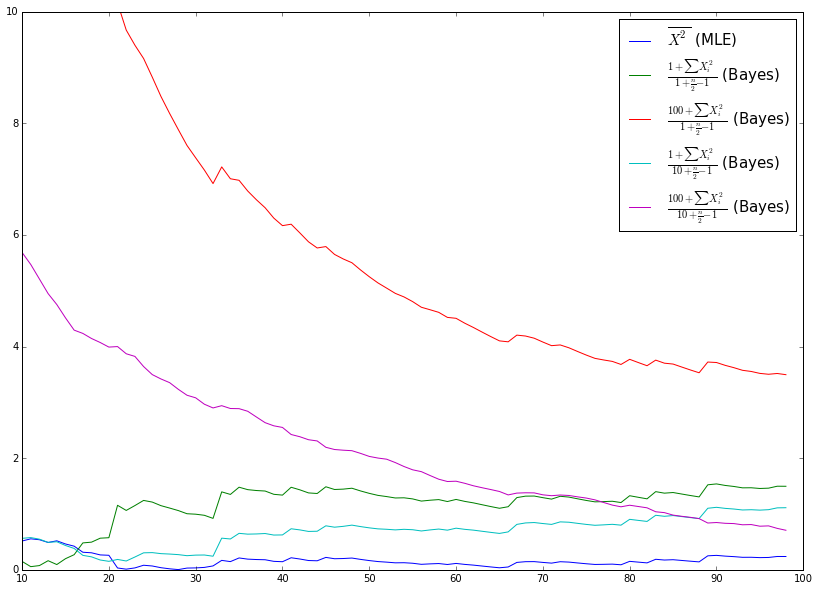

In [26]:
mle = [np.average(x_dist[:n] ** 2) for n in range (1, N)]
bayes1 = [(1 + np.sum(x_dist[:n] ** 2)) / (1 + n / 2 - 1) for n in range (1, N)]
bayes2 = [(100 + np.sum(x_dist[:n] ** 2)) / (1 + n / 2 - 1) for n in range (1, N)]
bayes3 = [(1 + np.sum(x_dist[:n] ** 2)) / (10 + n / 2 - 1) for n in range (1, N)]
bayes4 = [(100 + np.sum(x_dist[:n])) / (10 + n / 2 - 1) for n in range (1, N)]

plt.figure(figsize=(14, 10))
plt.plot(abs(np.zeros(N - 1) + 1 - mle), label='$\\overline{X^2}$ (MLE)')
plt.plot(abs(np.zeros(N - 1) + 1 - bayes1), label='$\\frac{1 + \\sum{X_i^2}}{1 + \\frac{n}{2} - 1}$ (Bayes)')
plt.plot(abs(np.zeros(N - 1) + 1 - bayes2), label='$\\frac{100 + \\sum{X_i^2}}{1 + \\frac{n}{2} - 1}$ (Bayes)')
plt.plot(abs(np.zeros(N - 1) + 1 - bayes3), label='$\\frac{1 + \\sum{X_i^2}}{10 + \\frac{n}{2} - 1}$ (Bayes)')
plt.plot(abs(np.zeros(N - 1) + 1 - bayes4), label='$\\frac{100 + \\sum{X_i^2}}{10 + \\frac{n}{2} - 1}$ (Bayes)')
plt.xlim(xmin=10)
plt.ylim(ymax=10)
plt.legend(fontsize=15)
plt.show()

Из графиков видно, что лучшая оценка — оценка максимального правдоподобия.